In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [3]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2)) 

In [5]:
img_path = "images/foto_desktop.jpeg"
img = cv2.imread(img_path)

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


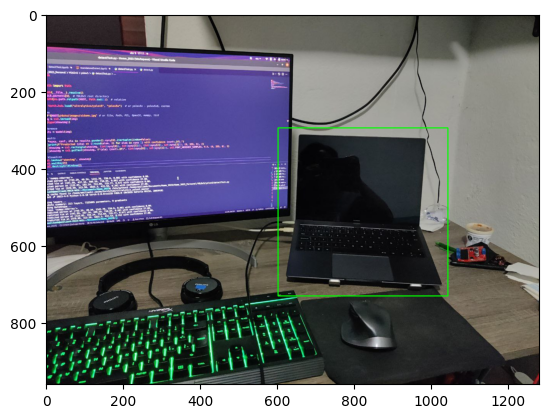

In [6]:
r = cv2.selectROI('demo', img, False, False)
# close cv2 windows
cv2.destroyAllWindows()
# crop image and show as matplotlib
cropped_xyxy = [r[0], r[1], r[0]+r[2], r[1]+r[3]]
cropped_image = img[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
#draw a rectangle around the selected region and show it
rectimg = cv2.rectangle(img, (int(r[0]), int(r[1])), (int(r[0]+r[2]), int(r[1]+r[3])), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(rectimg, cv2.COLOR_BGR2RGB))

In [7]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_l_0b3195.pth"
model_type = "vit_l"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [8]:
predictor.set_image(img)

In [9]:
input_box = np.array(cropped_xyxy)

masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

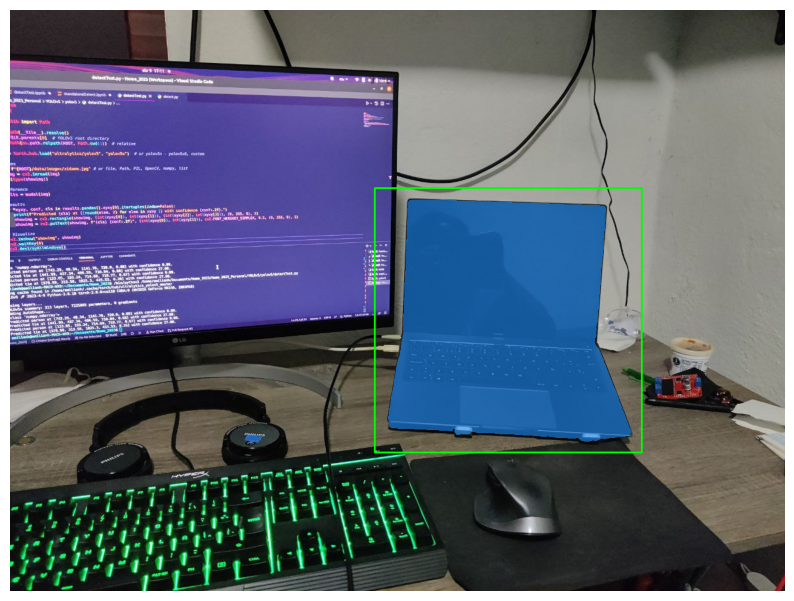

In [11]:

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
show_mask(masks[0], plt.gca())
plt.axis('off')
plt.show()